# Fundamentals of Machine Learning

## Machine learning regression tasks

Importing modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.linear_model #linear regression
import sklearn.svm #support vector machines
import sklearn.neural_network #multilayer perceptron
import sklearn.neighbors #k-nearest neighbors
import sklearn.tree #decision tree
import matplotlib.pyplot as plt #visualization

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('exampleObesityClassReg.csv')

### Data Preprocessing

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
54,Lithuania,Europe,0.238105,3,3028.733333,5672.133333,16555.633330,5563.266667,7525.733333,15141.200000,...,432.400000,33318.333330,17423.033330,10396.733330,5230.166667,185.333333,563.300000,24033.700000,30114.233330,61049.93333
12,Thailand,Asia,0.087858,1,265.400000,453.366667,950.533333,245.333333,14231.233330,6168.333333,...,1156.166667,10149.900000,4577.433333,4127.766667,647.533333,63.633333,45.866667,8105.400000,3701.600000,13473.66667
33,Finland,Europe,0.195756,2,7385.633333,17362.366670,16173.166670,14705.133330,8026.600000,10011.333330,...,3898.500000,129027.533300,40846.666670,13417.700000,10903.100000,428.833333,714.933333,21864.000000,43986.500000,189444.00000
66,Slovenia,Europe,0.263871,3,2454.966667,7337.333333,11419.266670,2031.900000,10990.766670,6365.633333,...,1059.166667,75184.000000,13103.766670,7001.166667,3239.900000,228.366667,353.100000,17559.200000,45317.533330,99504.33333
10,Republic of Korea,Asia,0.072649,1,76.833333,2790.000000,10688.666670,602.133333,73856.066670,18892.166670,...,434.233333,31600.666670,6489.466667,323.100000,4688.466667,108.500000,129.400000,10496.466670,14533.733330,35385.10000
38,Dominican Republic,America,0.201538,2,84.866667,1500.433333,1733.133333,37.566667,66378.866670,1975.666667,...,198.566667,11599.366670,605.600000,3772.566667,602.233333,102.133333,97.866667,8258.133333,12788.500000,15151.73333
6,Pakistan,Asia,0.059085,1,0.000000,21.300000,21.166667,1.733333,1102.900000,96.066667,...,76.700000,4773.133333,8.333333,142.600000,182.600000,12.166667,10.066667,2664.633333,2006.133333,4857.60000
17,France,Europe,0.155723,1,356.233333,23373.000000,20325.766670,11743.233330,12471.500000,7740.733333,...,2952.000000,61080.033330,21444.066670,17910.766670,4779.300000,624.733333,460.633333,21313.033330,56882.533330,108848.70000
30,Bolivia,America,0.185507,2,319.766667,632.666667,1068.633333,61.900000,34137.833330,1854.233333,...,250.033333,12939.166670,2183.066667,2325.233333,822.166667,107.200000,144.900000,9391.333333,20680.866670,15803.93333
58,Slovakia,Europe,0.240995,3,225.266667,9255.466667,14193.433330,1085.333333,9232.566667,9208.033333,...,870.100000,34700.733330,11754.000000,9412.066667,2256.433333,228.800000,482.233333,20662.900000,56551.000000,57554.86667


Describing the prevalence

In [4]:
data.prevalence.describe()

count    79.000000
mean      0.195593
std       0.080271
min       0.016048
25%       0.163696
50%       0.206130
75%       0.241439
max       0.353288
Name: prevalence, dtype: float64

Exploring the distribution of the labels

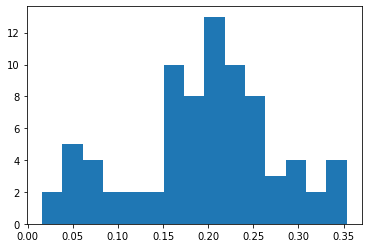

In [5]:
plt.hist(data.prevalence,bins=15)
plt.show()

Describing the shape of the dataframe

In [6]:
data.shape

(79, 52)

Creating a variable which only contains the predictor features

In [7]:
features = data[data.columns.difference(['prevalence','tertile','country_name','continent'])]

Saving the feature names into a variable

In [8]:
feature_names = features.columns

Visualizing the features

In [9]:
features.sample(3)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
77,132.166667,78885.133330,1277.766667,15191.40000,35.366667,3811.833333,27448.76667,4105.133333,243.066667,58.266667,...,24.733333,448.400000,20205.266670,718.600000,21488.6,1621.500000,1200.466667,143320.90000,44.6333,2893.533333
50,180.200000,72835.733330,24399.100000,60169.23333,650.766667,2934.533333,60260.23333,3600.300000,1321.166667,299.700000,...,198.766667,999.666667,47469.466670,1817.933333,45653.8,4045.333333,153.266667,91141.60000,25209.1333,9226.100000
12,1156.166667,2316.166667,31077.900000,52776.36667,52.366667,130.233333,31791.26667,90.766667,81.100000,63.633333,...,5893.633333,127.533333,4797.966667,503.133333,30846.9,506.333333,39.266667,37089.56667,125.6333,4577.433333


Creating a variable of the numerical labels of the dataset

In [10]:
labels_numerical = data.prevalence

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0

In [11]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

Checking if the range of the values is between 0 and 1

In [12]:
features[:1,:]

array([[1.03185572e-01, 1.33818127e-03, 1.09283215e-01, 1.49233599e-02,
        0.00000000e+00, 3.05246906e-03, 1.69307795e-02, 1.84287043e-03,
        3.35912234e-03, 3.22430631e-02, 6.25161770e-02, 1.95383271e-04,
        2.40807285e-02, 1.34124650e-01, 8.86528758e-02, 1.42828672e-03,
        9.25111471e-02, 2.12577881e-01, 1.51973811e-02, 3.83042097e-01,
        1.02277989e-01, 1.04349473e-02, 8.94231364e-03, 3.92787984e-01,
        2.35873654e-02, 8.23362026e-01, 4.57720111e-02, 1.29546406e-02,
        1.79410705e-03, 1.01928756e-02, 1.15803603e-01, 0.00000000e+00,
        3.52686069e-03, 5.51678163e-02, 1.21884279e-01, 3.08558548e-02,
        0.00000000e+00, 8.63255982e-03, 8.28225925e-02, 0.00000000e+00,
        3.55299793e-01, 5.99909253e-02, 1.22368333e-01, 3.11179893e-02,
        5.75844010e-02, 6.57770121e-01, 6.06134921e-03, 2.39244174e-02]])

Splitting the data into training and testing subsets

In [13]:
features_train, features_test, labels_numerical_train, labels_numerical_test = sklearn.model_selection.train_test_split(
    features,
    labels_numerical,
    test_size=0.30,
    random_state = 55
)

In [14]:
features_train

array([[3.10005874e-02, 1.98881520e-01, 3.32067154e-02, ...,
        1.42468362e-01, 1.20271631e-02, 1.56250255e-01],
       [5.87793249e-02, 5.59400214e-01, 4.36056485e-01, ...,
        9.76227321e-01, 1.39791102e-01, 4.99897972e-01],
       [4.12362229e-02, 5.49619709e-02, 2.59055740e-01, ...,
        1.55432033e-01, 1.23388777e-02, 1.46251479e-02],
       ...,
       [3.42880835e-01, 3.97060010e-01, 5.14808573e-01, ...,
        2.50535117e-01, 4.33482751e-01, 3.20884790e-01],
       [8.27315759e-02, 6.62700246e-01, 1.37732071e-02, ...,
        5.41375111e-01, 2.70145690e-02, 1.88936049e-01],
       [2.40299900e-02, 4.09165363e-01, 7.62634182e-03, ...,
        8.41336885e-01, 9.33748442e-04, 7.06493082e-02]])

### Machine Learning Data Analysis

Training a linear regression model

In [15]:
regressor = sklearn.linear_model.LinearRegression()

In [16]:
regressor.fit(features_train,labels_numerical_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Printing the coefficients of each feature

In [17]:
regressor.coef_

array([ 0.16677324, -0.35906334,  0.03765829, -0.00785051, -0.04918158,
        0.06337703,  0.16007784, -0.18941514,  0.06405334, -0.30994365,
       -0.070123  , -0.07786633, -0.52686665, -0.16103048, -0.10058087,
        0.04266822,  0.31223977,  0.01970688,  0.24363222, -0.21940706,
        0.00305268,  0.0564445 , -0.05077532,  0.25046921,  0.85479572,
       -0.14173477, -0.04803398, -0.0340297 , -0.36134998,  0.14881112,
        0.44305301, -0.10840107, -0.07486004, -0.02140524, -0.03044997,
        0.04409911,  0.32655928, -0.05034695, -0.05027414,  0.08651873,
       -0.13958739,  0.12765063, -0.00630166, -0.12305165,  0.08047724,
       -0.04569768,  0.18668161, -0.27430608])

Printing the intercept of the linear model

In [18]:
regressor.intercept_

0.12451923906612497

Making predictions over the testing subset

In [19]:
predictions = regressor.predict(features_test)

In [20]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
22,0.245770,0.498653
21,0.263871,0.270861
1,0.070481,0.134732
5,0.054962,-0.107278
9,0.165021,0.302789


Calculating the mean absolute error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

In [21]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.12506414047167183

Calculating the root mean squared error
$$RMSE = \sqrt {\frac{1}{n}\sum_{j=1}^{n}\left ( y_{i} - \hat{y}_{i} \right )^{2}}$$

In [22]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.15151306109587895

Calculating the r-squared statistic

In [23]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

-1.830638839255844

### Random Forest Regressor

Training a random forest regressor with 100 trees

In [24]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

In [25]:
regressor.fit(features_train,labels_numerical_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=15, verbose=0,
                      warm_start=False)

Predicting the labels from the test features subset

In [26]:
predictions = regressor.predict(features_test)

In [27]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical_test,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

Calculating MAE

In [28]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.047429547056249986

Calculating RMSE

In [29]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.06232385596461852

Calculating r-squared

In [30]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.5210469462202856

Exploring the absolute errors by country that are in the testing dataset

In [34]:
summary

,country,true,predicted,AE
11,Taiwan,0.083790,0.083843,0.000053
6,Pakistan,0.254970,0.253157,0.001814
22,Uzbekistan,0.245770,0.248652,0.002883
7,Singapore,0.212405,0.219636,0.007231
2,Japan,0.241884,0.253040,0.011156
4,Indonesia,0.046816,0.064171,0.017354
15,Malaysia,0.240199,0.221080,0.019119
9,Nigeria,0.165021,0.194351,0.029331
1,India,0.070481,0.100898,0.030417
10,Republic of Korea,0.197482,0.233759,0.036278


Plotting the absolute errors by country, sorted by absolute error

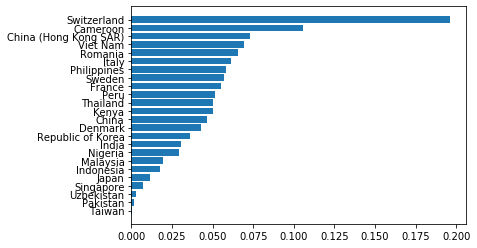

In [35]:
plt.barh(summary.country,summary.AE)
plt.show()

Extracting the variable importance list from the random forest regressor

In [36]:
vil = pd.DataFrame(list(zip(feature_names,regressor.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [37]:
vil.head()

,feature,mean_gini_decrease
18,Flours,0.216724
1,Baked Goods,0.198426
30,Pulses,0.095162
25,Nuts,0.077482
10,Coffee,0.055321


Plotting the variable importance list sorted by the mean decrease gini

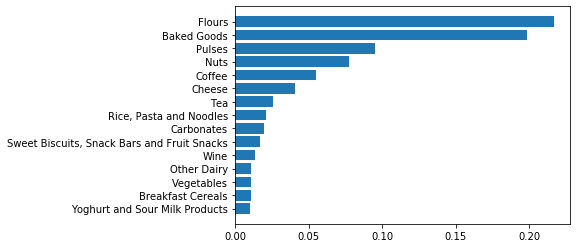

In [38]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

Averaging the VIL from 50 random forest runs

In [39]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
    rf = rf.fit(features_train,labels_numerical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [40]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [41]:
mean_vil.head()

,feature,mean_gini_decrease
1,Baked Goods,0.211079
18,Flours,0.162000
25,Nuts,0.104333
30,Pulses,0.096961
10,Coffee,0.050669


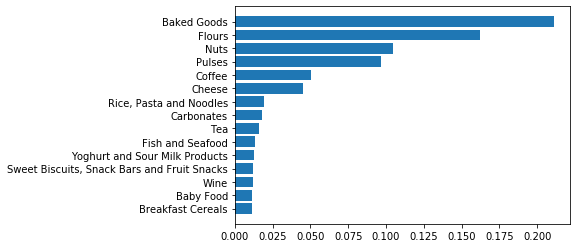

In [42]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

### Constructing a cross-validated estimator to predict over all countries

In [43]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

Training a estimator using the entire dataset but using cross validation to empower the generalization

In [44]:
predictions = sklearn.model_selection.cross_val_predict(regressor, features, labels_numerical)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [45]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

In [46]:
summary

,country,true,predicted,AE
37,Morocco,0.199042,0.198994,0.000048
52,Kazakhstan,0.236503,0.236439,0.000064
43,Germany,0.211409,0.211617,0.000208
35,Norway,0.196593,0.196343,0.000250
31,Belgium,0.186661,0.186956,0.000295
40,Guatemala,0.206170,0.206539,0.000369
41,Georgia,0.209004,0.206802,0.002201
30,Bolivia,0.185507,0.175135,0.010372
45,Latvia,0.214695,0.225184,0.010489
33,Finland,0.195756,0.183934,0.011823


Plotting the absolute errors by country, sorted by absolute error

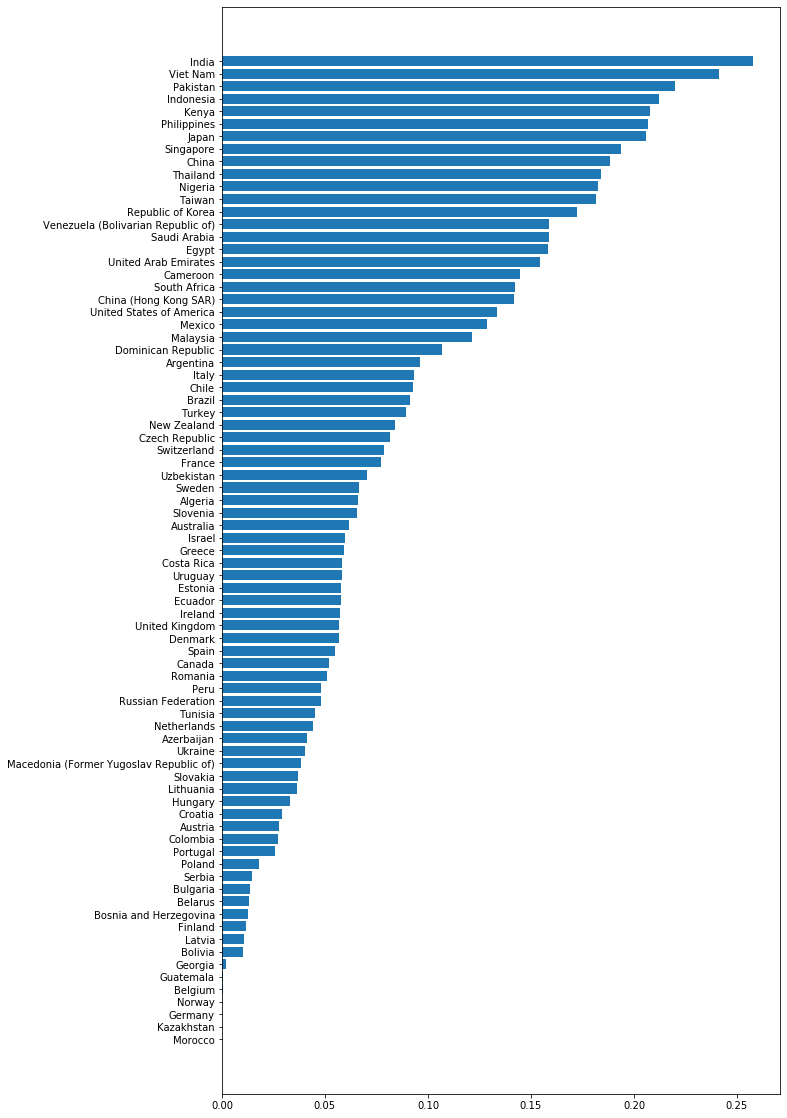

In [47]:
plt.figure(figsize=(10,20))
plt.barh(summary.country,summary.AE)
plt.show()

### Comparison Between Diferent Machine Learning Models and Hyperparameters

Selecting some machine learning training algorithms, training each one and using cross validation to retrieve their performance

In [48]:
models = []

models.append(("LinearRegression",sklearn.linear_model.LinearRegression()))
models.append(("SVR",sklearn.svm.SVR()))
models.append(("RandomForest",sklearn.ensemble.RandomForestRegressor()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsRegressor()))
models.append(("MLPRegressor",sklearn.neural_network.MLPRegressor()))
models.append(("DecisionTreeRegressor",sklearn.tree.DecisionTreeRegressor()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_numerical,  
                             cv=10, 
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)


List of compared models along with their hyperparameters

In [49]:
models

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
      gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
      tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('KNeighbors',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('MLPR

Box plot of the results (negative mean absolute error) of each model

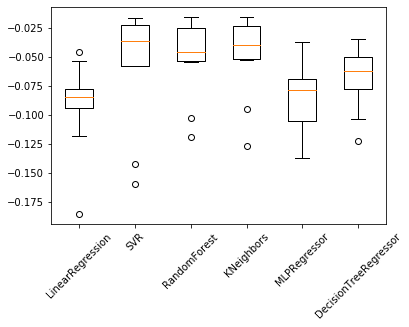

In [50]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [51]:
##########

#compare the models based on other metric

##########

Grid search for selection of the best hyperparameters

In [52]:
# # HIGH PROCESSOR INTENSIVE TASK (~5 minutes calculations of a 12 cores machine)

# parameters = {'n_estimators': list(range(260,360,20)),
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': list(range(20,100,20))+[None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]
# }
# grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
#                                                    parameters, 
#                                                    n_jobs=-1,
#                                                    cv = 3,
#                                                    scoring = 'neg_mean_squared_error'
#                                                   )

# grid_Search.fit(features_train,labels_numerical_train)

In [53]:
#low intensive grid search
parameters = {'n_estimators': [100,150,200]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3,
                                                   scoring = 'neg_mean_absolute_error'
                                                  )

grid_Search.fit(features_train,labels_numerical_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]},

The best hyperparameters extracted from the grid search

In [54]:
grid_Search.best_params_

{'n_estimators': 150}

The result of each run of the grid search

In [55]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,mean_score_time,mean_test_score,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score
0,0.215972,0.093782,-0.045840,100,{'n_estimators': 100},3,-0.035745,-0.058905,-0.043432,0.005280,0.042414,0.009642
1,0.447380,0.052862,-0.043808,150,{'n_estimators': 150},1,-0.036451,-0.054113,-0.041269,0.006179,0.009021,0.007454
2,0.461025,0.018402,-0.044632,200,{'n_estimators': 200},2,-0.036456,-0.055559,-0.042336,0.059071,0.001831,0.007993


Making predictions over the test subset using the best model from the grid search

In [56]:
predictions = grid_Search.predict(features_test)

Summary of the results

In [57]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
8,0.155723,0.217044
23,0.046494,0.131412
22,0.245770,0.247051
16,0.044837,0.236814
2,0.241884,0.258855


MAE

In [58]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.050770131071560844

RMSE

In [59]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.0641850511048383

R-squared

In [60]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.49201358416601537

In [61]:
##########

#make your own grid search for other training algorithm

##########